In [44]:
import pandas as pd
from author_properties_transformers import author_influence



from datetime import timezone, datetime
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import FunctionTransformer
import seaborn as sns

In [26]:
df = pd.read_csv("../Data/wsb_full_not_deleted_withdt.csv")

df = df.loc[df.author != "None"]


C:\Users\lnajt\anaconda3\envs\Erdos_Institute\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (79,88,117,118,119,122,123,124,125) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:

df ["created_datetime_utc"] = df["created_utc"].apply(datetime.utcfromtimestamp)


In [47]:
df_cleaned = df[ [  'id', 'title', 'author', 'ups', 'created_datetime_utc']]

In [29]:
'''

for summary_type in ['sum', 'mean', 'median', 'count' ]:
    pop_agg = author_influence()
    pop_agg.kind = summary_type
    pop_agg.fit(df_cleaned)
    df_cleaned["agg" + summary_type] = pop_agg.transform(df)
    print("finished with", summary_type)
    
df_cleaned

'''
#

'\n\nfor summary_type in [\'sum\', \'mean\', \'median\', \'count\' ]:\n    pop_agg = author_influence()\n    pop_agg.kind = summary_type\n    pop_agg.fit(df)\n    df["agg" + summary_type] = pop_agg.transform(df)\n    print("finished with", summary_type)\n    \ndf\n\n'

In [66]:
df_cleaned.created_datetime_utc[0].weekday()

2

In [69]:
df_cleaned['weektime'] = df_cleaned['created_datetime_utc'].apply( lambda x : x.weekday()*24 + x.hour)
df_cleaned['time_of_day'] = df_cleaned['created_datetime_utc'].apply( lambda x : x.hour)

<ipython-input-69-109eaf30f3f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['weektime'] = df_cleaned['created_datetime_utc'].apply( lambda x : x.weekday()*24 + x.hour)
<ipython-input-69-109eaf30f3f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_of_day'] = df_cleaned['created_datetime_utc'].apply( lambda x : x.hour)


In [32]:
author_stat_features = FeatureUnion([('aggsum', author_influence(kind = 'sum')), 
                           ('aggmean', author_influence(kind = 'mean')), 
                           ('aggmedian', author_influence(kind = 'median')),
                            ('aggcount', author_influence(kind = 'count'))
                           
                           ])
# testing:
# todo: make sure that nothing gets modified inplace that shouldnt be...
# author_stat_features
# author_stat_features.fit(df)
# pd.DataFrame(author_stat_features.transform(df))


In [70]:

time_features = make_union( make_column_transformer(  (FunctionTransformer(lambda x : x), ["weektime", "time_of_day"] ),
                                                   )            
                          )

#time_features.fit_transform(df_cleaned)


array([[71, 23],
       [71, 23],
       [70, 22],
       ...,
       [43, 19],
       [43, 19],
       [43, 19]], dtype=int64)

In [ ]:
nlp_features = FeatureUnion([
    
    
    
    
])

In [71]:


all_features = make_union ( author_stat_features, time_features )

In [72]:
lr = LinearRegression()

pipe = make_pipeline(all_features, lr)

<AxesSubplot:ylabel='ups'>

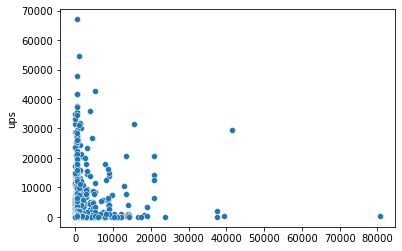

In [74]:


X_train, X_test, y_train, y_test = train_test_split(df_cleaned, df_cleaned.ups,
                                                    random_state=0)

pipe.fit(X_train, y_train)

pipe.predict(X_test)

sns.scatterplot(x = pipe.predict(X_test), y = y_test)

<AxesSubplot:ylabel='ups'>

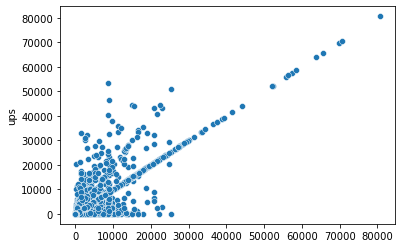

In [75]:
sns.scatterplot(x = pipe.predict(X_train), y = y_train)

In [78]:

scores = cross_val_score(pipe, df_cleaned, df_cleaned.ups)

In [79]:
scores

array([-0.06274774, -0.3992471 , -0.08701835, -0.44122021, -0.01894692])